In [51]:
import pandas as pd
import requests
from pathlib import Path
import json
import datetime
import numpy as np
import os

import matplotlib.pyplot as plt
# Import ClusterCentroids from imblearn
from imblearn.under_sampling import ClusterCentroids
from sklearn.metrics import confusion_matrix,classification_report

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import ExtraTreesClassifier


#my private libraries
import load_data as ld
import twitter_lib as tl
import wsj_lib as wsj
import ml_lib as ml


In [2]:
prefix='btc'  # used for creating file name
coin_ticker='BTC-USD'
source = 'twitter'      # for augmento

coin = 'bitcoin'       # used in Augmento 
num_of_periods = 1000   # 1000 days  usedin Augmento
bin_size='24H'          #default bin size for Augmento

# used by Augmento and Yahoo Finance Apis
start="2019-04-01T00:00:00Z"
end ="2022-01-30T00:00:00Z"


In [3]:
# Get sentiment from twitter/ reddit data obtained from augmento site 
sentiment_df = tl.get_crypto_sentiment_from_augmento(source, coin, num_of_periods, start, end, bin_size)

In [4]:
sentiment_df.head()

,FOMO,Uncertain,Hopeful,Bearish,Pessimistic/Doubtful,Sad,Fearful/Concerned,Angry,Mistrustful,Panicking,Annoyed/Frustrated,Bullish,Optimistic,Happy,Euphoric/Excited
Date,,,,,,,,,,,,,,,
2019-04-01,14.0,81.0,23.0,123.0,14.0,3.0,17.0,9.0,4.0,0.0,1.0,233.0,82.0,11.0,76.0
2019-04-02,58.0,216.0,78.0,199.0,42.0,7.0,35.0,32.0,1.0,10.0,2.0,523.0,129.0,58.0,223.0
2019-04-03,49.0,198.0,42.0,163.0,28.0,11.0,22.0,21.0,5.0,3.0,9.0,433.0,103.0,22.0,164.0
2019-04-04,20.0,115.0,35.0,145.0,19.0,4.0,22.0,9.0,4.0,2.0,2.0,262.0,90.0,19.0,81.0
2019-04-05,17.0,112.0,24.0,90.0,17.0,1.0,29.0,6.0,4.0,2.0,1.0,245.0,103.0,18.0,65.0


In [30]:
# Get sentiment from WSJ data using NLTK library
#wsj_sentiment=wsj.get_sentiments_from_wsj()

In [31]:
#wsj_sentiment.head()

In [32]:
'''
wsj_sentiment=wsj_sentiment.reset_index()
wsj_sentiment['Date']=pd.to_datetime(wsj_sentiment['Date'])
wsj_sentiment=wsj_sentiment.set_index('Date')
wsj_sentiment=wsj_sentiment.groupby(by='Date').mean()
'''

"\nwsj_sentiment=wsj_sentiment.reset_index()\nwsj_sentiment['Date']=pd.to_datetime(wsj_sentiment['Date'])\nwsj_sentiment=wsj_sentiment.set_index('Date')\nwsj_sentiment=wsj_sentiment.groupby(by='Date').mean()\n"

In [5]:
#sentiment_df = wsj_sentiment.copy()
sentiment_df.index

Index([2019-04-01, 2019-04-02, 2019-04-03, 2019-04-04, 2019-04-05, 2019-04-06,
       2019-04-07, 2019-04-08, 2019-04-09, 2019-04-10,
       ...
       2021-12-16, 2021-12-17, 2021-12-18, 2021-12-19, 2021-12-20, 2021-12-21,
       2021-12-22, 2021-12-23, 2021-12-24, 2021-12-25],
      dtype='object', name='Date', length=1000)

In [6]:
# sentiment_df index is of 'object' type. needs to change to datetime index, like the coin index from yahoo fin
sentiment_df=sentiment_df.reset_index()
sentiment_df['Date']=pd.to_datetime(sentiment_df['Date'])
sentiment_df=sentiment_df.set_index('Date')

In [7]:
sentiment_df.head()

,FOMO,Uncertain,Hopeful,Bearish,Pessimistic/Doubtful,Sad,Fearful/Concerned,Angry,Mistrustful,Panicking,Annoyed/Frustrated,Bullish,Optimistic,Happy,Euphoric/Excited
Date,,,,,,,,,,,,,,,
2019-04-01,14.0,81.0,23.0,123.0,14.0,3.0,17.0,9.0,4.0,0.0,1.0,233.0,82.0,11.0,76.0
2019-04-02,58.0,216.0,78.0,199.0,42.0,7.0,35.0,32.0,1.0,10.0,2.0,523.0,129.0,58.0,223.0
2019-04-03,49.0,198.0,42.0,163.0,28.0,11.0,22.0,21.0,5.0,3.0,9.0,433.0,103.0,22.0,164.0
2019-04-04,20.0,115.0,35.0,145.0,19.0,4.0,22.0,9.0,4.0,2.0,2.0,262.0,90.0,19.0,81.0
2019-04-05,17.0,112.0,24.0,90.0,17.0,1.0,29.0,6.0,4.0,2.0,1.0,245.0,103.0,18.0,65.0


In [8]:
df_coin= ld.load_from_yahoo([coin_ticker], start,end)

In [9]:
df_coin.head()

BTC-USD                                                      \
                   high          low         open        close       volume   
Date                                                                          
2019-04-01  4164.953125  4096.901367  4105.362305  4158.183105  10157794171   
2019-04-02  4905.954590  4155.316895  4156.919434  4879.877930  21315047816   
2019-04-03  5307.003418  4876.621094  4879.958008  4973.021973  22899891582   
2019-04-04  5063.159668  4836.793945  4971.307617  4922.798828  18251810240   
2019-04-05  5053.509766  4919.491699  4922.806152  5036.681152  16837325387   

                         
              adj close  
Date                     
2019-04-01  4158.183105  
2019-04-02  4879.877930  
2019-04-03  4973.021973  
2019-04-04  4922.798828  
2019-04-05  5036.681152

In [38]:
df_coin.index

DatetimeIndex(['2019-04-01', '2019-04-02', '2019-04-03', '2019-04-04',
               '2019-04-05', '2019-04-06', '2019-04-07', '2019-04-08',
               '2019-04-09', '2019-04-10',
               ...
               '2022-01-22', '2022-01-23', '2022-01-24', '2022-01-25',
               '2022-01-26', '2022-01-27', '2022-01-28', '2022-01-29',
               '2022-01-30', '2022-01-31'],
              dtype='datetime64[ns]', name='Date', length=1037, freq=None)

In [10]:
joined_df = sentiment_df.join(df_coin[coin_ticker]['close'])
joined_df['daily_ret']=joined_df['close'].pct_change()
#joined_df['daily_ret']=joined_df['close'].pct_change().shift()

In [40]:
# Create short and long window for sentiment averaging, just like we do for daily_returns. This is 
# smoothing out the sentiment in a short and long window of time.

short_window = 0
long_window = 0

In [41]:
#joined_df['SENTIMENT_short_wsj']=joined_df['scores'].rolling(window=short_window).mean()
#joined_df['SENTIMENT_long_wsj']=joined_df['scores'].rolling(window=long_window).mean()

In [42]:
#X=joined_df[['SENTIMENT_short_wsj', 'SENTIMENT_long_wsj']].shift().copy()
#X=joined_df[['SENTIMENT_short_wsj', 'SENTIMENT_long_wsj']].copy()

In [11]:
# Create a strategy for making a signal. if the daily_ret is >= 0 then it is a buy signal or 1, and
# if daily_ret is <0 then it is a sell signal or -1.
joined_df['signal'] = 0.0
joined_df.loc[(joined_df['daily_ret'] >= 0), 'signal'] = 1
joined_df.loc[(joined_df['daily_ret'] < 0), 'signal'] = -1


In [12]:
joined_df.tail()

,FOMO,Uncertain,Hopeful,Bearish,Pessimistic/Doubtful,Sad,Fearful/Concerned,Angry,Mistrustful,Panicking,Annoyed/Frustrated,Bullish,Optimistic,Happy,Euphoric/Excited,close,daily_ret,signal
Date,,,,,,,,,,,,,,,,,,
2021-12-21,7.0,59.0,18.0,44.0,14.0,3.0,7.0,5.0,1.0,0.0,2.0,128.0,72.0,14.0,37.0,48936.613281,0.043864,1.0
2021-12-22,10.0,31.0,16.0,32.0,8.0,1.0,6.0,2.0,2.0,2.0,2.0,99.0,48.0,16.0,35.0,48628.511719,-0.006296,-1.0
2021-12-23,9.0,53.0,17.0,30.0,8.0,3.0,8.0,3.0,2.0,1.0,2.0,106.0,55.0,11.0,46.0,50784.539062,0.044337,1.0
2021-12-24,6.0,39.0,18.0,13.0,7.0,3.0,8.0,1.0,1.0,0.0,1.0,81.0,26.0,27.0,20.0,50822.195312,0.000741,1.0
2021-12-25,6.0,23.0,9.0,21.0,5.0,2.0,7.0,1.0,2.0,0.0,0.0,44.0,24.0,14.0,22.0,50429.859375,-0.007720,-1.0


In [13]:
joined_df=joined_df.dropna()

In [14]:
joined_df.head()

,FOMO,Uncertain,Hopeful,Bearish,Pessimistic/Doubtful,Sad,Fearful/Concerned,Angry,Mistrustful,Panicking,Annoyed/Frustrated,Bullish,Optimistic,Happy,Euphoric/Excited,close,daily_ret,signal
Date,,,,,,,,,,,,,,,,,,
2019-04-02,58.0,216.0,78.0,199.0,42.0,7.0,35.0,32.0,1.0,10.0,2.0,523.0,129.0,58.0,223.0,4879.877930,0.173560,1.0
2019-04-03,49.0,198.0,42.0,163.0,28.0,11.0,22.0,21.0,5.0,3.0,9.0,433.0,103.0,22.0,164.0,4973.021973,0.019087,1.0
2019-04-04,20.0,115.0,35.0,145.0,19.0,4.0,22.0,9.0,4.0,2.0,2.0,262.0,90.0,19.0,81.0,4922.798828,-0.010099,-1.0
2019-04-05,17.0,112.0,24.0,90.0,17.0,1.0,29.0,6.0,4.0,2.0,1.0,245.0,103.0,18.0,65.0,5036.681152,0.023134,1.0
2019-04-06,12.0,86.0,24.0,84.0,25.0,3.0,14.0,6.0,3.0,2.0,1.0,243.0,60.0,11.0,63.0,5059.817383,0.004594,1.0


In [15]:
# Make the 'features' and 'target' dataframes
y = joined_df['signal'].copy()
X=joined_df.drop(columns=['daily_ret', 'close', 'signal']).copy()


In [16]:
# This is just to test without any SMA stragetgy. Purely on daily sentiments
#X=pd.DataFrame(joined_df['scores'])


In [17]:
X.head()

,FOMO,Uncertain,Hopeful,Bearish,Pessimistic/Doubtful,Sad,Fearful/Concerned,Angry,Mistrustful,Panicking,Annoyed/Frustrated,Bullish,Optimistic,Happy,Euphoric/Excited
Date,,,,,,,,,,,,,,,
2019-04-02,58.0,216.0,78.0,199.0,42.0,7.0,35.0,32.0,1.0,10.0,2.0,523.0,129.0,58.0,223.0
2019-04-03,49.0,198.0,42.0,163.0,28.0,11.0,22.0,21.0,5.0,3.0,9.0,433.0,103.0,22.0,164.0
2019-04-04,20.0,115.0,35.0,145.0,19.0,4.0,22.0,9.0,4.0,2.0,2.0,262.0,90.0,19.0,81.0
2019-04-05,17.0,112.0,24.0,90.0,17.0,1.0,29.0,6.0,4.0,2.0,1.0,245.0,103.0,18.0,65.0
2019-04-06,12.0,86.0,24.0,84.0,25.0,3.0,14.0,6.0,3.0,2.0,1.0,243.0,60.0,11.0,63.0


In [18]:
y[:5]

Date
2019-04-02    1.0
2019-04-03    1.0
2019-04-04   -1.0
2019-04-05    1.0
2019-04-06    1.0
Name: signal, dtype: float64

In [19]:
# save the X and Y to csv for use in Neural Network training
X.to_csv('X.csv')
y.to_csv('y.csv')

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.head()

,FOMO,Uncertain,Hopeful,Bearish,Pessimistic/Doubtful,Sad,Fearful/Concerned,Angry,Mistrustful,Panicking,Annoyed/Frustrated,Bullish,Optimistic,Happy,Euphoric/Excited
Date,,,,,,,,,,,,,,,
2021-04-05,15.0,58.0,21.0,29.0,10.0,2.0,15.0,4.0,0.0,1.0,1.0,134.0,60.0,16.0,51.0
2019-11-15,7.0,88.0,16.0,69.0,8.0,0.0,13.0,11.0,1.0,0.0,0.0,159.0,61.0,14.0,47.0
2019-09-17,6.0,72.0,22.0,67.0,24.0,0.0,17.0,14.0,2.0,1.0,1.0,147.0,80.0,14.0,64.0
2020-01-18,7.0,71.0,15.0,34.0,11.0,3.0,10.0,4.0,0.0,0.0,3.0,113.0,51.0,11.0,35.0
2020-08-16,2.0,51.0,20.0,29.0,9.0,3.0,6.0,12.0,1.0,2.0,4.0,140.0,68.0,11.0,46.0


In [21]:
# Scale the data
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [22]:
X_train_scaled.shape

(749, 15)

In [26]:


# Instantiate a ClusterCentroids instance
cc_sampler = ClusterCentroids(random_state=1)
# Fit the training data to the cluster centroids model
X_resampled, y_resampled = cc_sampler.fit_resample(X_train_scaled, y_train)
# Count distinct values for the resampled target data
y_resampled.value_counts()

C:\Users\kraso\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


-1.0    348
 1.0    348
Name: signal, dtype: int64

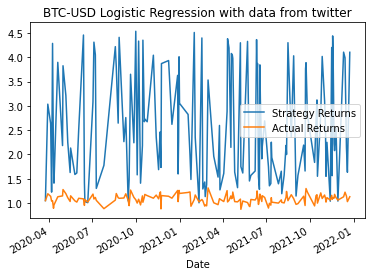

In [34]:
#cum_ret.plot(title=coin_ticker+' Logistic Regression w short='+str(short_window)+' long='+str(long_window))
#plt.savefig(source+'_'+prefix+'_Log_reg_SMA_short'+str(short_window)+'_long'+str(long_window)+'.png')
cum_ret.plot(title=coin_ticker+' Logistic Regression with data from '+source)
plt.savefig(source+'_'+prefix+'_Log_reg.png')

In [35]:
# Print confusion matrix
print(confusion_matrix(y_test, y_pred))

[[81 42]
 [62 65]]


In [36]:
# Print classification report
class_rep = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -1.0       0.57      0.66      0.61       123
         1.0       0.61      0.51      0.56       127

    accuracy                           0.58       250
   macro avg       0.59      0.59      0.58       250
weighted avg       0.59      0.58      0.58       250



In [28]:
model_abc = AdaBoostClassifier(n_estimators=80)
y_pred = ml.model_fit_predict(model_abc, X_resampled, y_resampled, X_test_scaled)
#y_pred = ml.model_fit_predict(model_abc, X_train_scaled, y_train, X_test_scaled)


In [29]:
class_rep = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -1.0       0.56      0.48      0.52       120
         1.0       0.58      0.65      0.61       130

    accuracy                           0.57       250
   macro avg       0.57      0.56      0.56       250
weighted avg       0.57      0.57      0.57       250



In [66]:
results_dict = {
    'Date': pd.datetime.today(),
    "Model": 'AdaBoost Model',
    'DataSource': source,
    'Coin': coin_ticker,
    'Short': short_window,
    'Long': long_window,
    'Accuracy':class_rep['accuracy'],
    'Recall 1': class_rep['1.0']['recall'],
    'Recall -1': class_rep['-1.0']['recall']
}

# To store classification report stats in a dataframe and then to a csv file for later retrieval
results_df = results_df.append(results_dict, ignore_index=True)

C:\Users\kraso\AppData\Local\Temp\ipykernel_11460\876585405.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  'Date': pd.datetime.today(),
C:\Users\kraso\AppData\Local\Temp\ipykernel_11460\876585405.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_dict, ignore_index=True)


In [30]:
cum_ret = ml.get_Strategy_and_Actual_returns(X_test.index, y_pred, X_test_df)

<AxesSubplot:title={'center':'BTC-USD Adaboost with Data from twitter'}, xlabel='Date'>

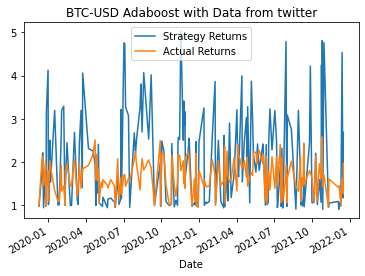

In [31]:
#cum_ret.plot(title=coin_ticker+' Adaboost w short='+str(short_window)+' long='+str(long_window))
#plt.savefig(source+'_'+prefix+'_Adaboost_SMA_short'+str(short_window)+'_long'+str(long_window)+'.png')
cum_ret.plot(title=coin_ticker+' Adaboost with Data from '+source)
#plt.savefig(source+'_'+prefix+'_Adaboost.png')
#plt.savefig(source+'_'+prefix+'_Adaboost_SMA_short'+str(short_window)+'_long'+str(long_window)+'.png')

#cum_ret.plot(title=coin_ticker+ ' Adaboost Model w short=6 long=100)')
#plt.savefig(prefix+ '_Adaboost_SMA_short6_long100.png')

In [32]:
model_rfc = RandomForestClassifier(n_estimators=6, max_depth=None,
                               min_samples_split=2, random_state=0)
# seems like Beyod n_estimators= 5, the accuracy begins to drop below 50%

In [33]:
y_pred = ml.model_fit_predict(model_rfc, X_resampled, y_resampled, X_test_scaled)
#y_pred = ml.model_fit_predict(model_rfc, X_train_scaled, y_train, X_test_scaled)

cum_ret = ml.get_Strategy_and_Actual_returns(X_test.index, y_pred, X_test_df)
class_rep = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -1.0       0.51      0.68      0.59       120
         1.0       0.58      0.40      0.47       130

    accuracy                           0.54       250
   macro avg       0.55      0.54      0.53       250
weighted avg       0.55      0.54      0.53       250



In [51]:
results_df.to_csv(source+'_classification_reports.csv', mode='a', header=None)

In [39]:
# Use the trained model to predict the trading signals for the testing data.
testing_signal_predictions = model_abc.predict(X_test_scaled)

In [40]:
# Evaluate the model's ability to predict the trading signal for the testing data using a classification report
training_report = classification_report(y_test, testing_signal_predictions)
print(training_report)

              precision    recall  f1-score   support

        -1.0       0.56      0.48      0.52       120
         1.0       0.58      0.65      0.61       130

    accuracy                           0.57       250
   macro avg       0.57      0.56      0.56       250
weighted avg       0.57      0.57      0.57       250



In [41]:
# Create a new empty predictions DataFrame using code provided below.
predictions_df = pd.DataFrame(index=X_test.index)
predictions_df['predicted_returns'] = testing_signal_predictions
predictions_df['predicted_returns'].value_counts()

 1.0    146
-1.0    104
Name: predicted_returns, dtype: int64

In [43]:
# Add in actual returns and calculate trading returns
predictions_df['actual_returns'] = joined_df['daily_ret']
predictions_df['trading_algorithm_returns'] = predictions_df['actual_returns'] * predictions_df['predicted_returns']
predictions_df

,predicted_returns,actual_returns,trading_algorithm_returns
Date,,,
2019-12-09,1.0,-0.021607,-0.021607
2019-06-08,1.0,-0.011167,-0.011167
2019-12-26,-1.0,-0.004974,0.004974
2020-09-29,-1.0,0.012604,-0.012604
2020-12-14,1.0,0.005447,0.005447
...,...,...,...
2020-11-17,1.0,0.055593,0.055593
2021-10-26,1.0,-0.042450,-0.042450
2020-07-02,1.0,-0.011369,-0.011369


<AxesSubplot:xlabel='Date'>

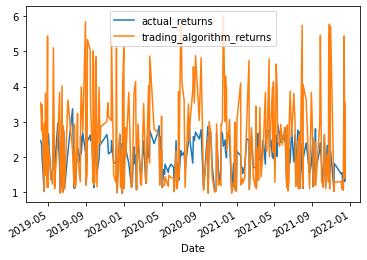

In [44]:
# Calculate and plot the cumulative returns for the `actual_returns` and the `trading_algorithm_returns`
(1 + predictions_df[['actual_returns', 'trading_algorithm_returns']]).cumprod().plot()

In [52]:
# get the sentiment for the day
prefix='btc'  # used for creating file name
coin_ticker='BTC-USD'
source = 'twitter'      # for augmento

coin = 'bitcoin'       # used in Augmento 
num_of_periods = 100   # 1000 days  usedin Augmento
bin_size='24H'          #default bin size for Augmento

# used by Augmento and Yahoo Finance Apis
start="2022-06-04T00:00:00Z"
end ="2022-06-06T00:00:00Z"

In [53]:
# Get sentiment from twitter/ reddit data obtained from augmento site 
sentiment_df_1 = tl.get_crypto_sentiment_from_augmento(source, coin, num_of_periods, start, end, bin_size)

In [54]:
sentiment_df_1.head()

,FOMO,Uncertain,Hopeful,Bearish,Pessimistic/Doubtful,Sad,Fearful/Concerned,Angry,Mistrustful,Panicking,Annoyed/Frustrated,Bullish,Optimistic,Happy,Euphoric/Excited
Date,,,,,,,,,,,,,,,
2022-06-04,2.0,28.0,5.0,47.0,8.0,4.0,4.0,5.0,0.0,1.0,0.0,45.0,25.0,1.0,15.0
2022-06-05,6.0,32.0,8.0,43.0,10.0,1.0,5.0,1.0,0.0,1.0,1.0,74.0,32.0,3.0,11.0


In [55]:
# get the sum of the sentiment data for the day
sentiment_df_1['Senti_Sum'] = sentiment_df_1.sum(axis=1)
sentiment_df_1

,FOMO,Uncertain,Hopeful,Bearish,Pessimistic/Doubtful,Sad,Fearful/Concerned,Angry,Mistrustful,Panicking,Annoyed/Frustrated,Bullish,Optimistic,Happy,Euphoric/Excited,Senti_Sum
Date,,,,,,,,,,,,,,,,
2022-06-04,2.0,28.0,5.0,47.0,8.0,4.0,4.0,5.0,0.0,1.0,0.0,45.0,25.0,1.0,15.0,190.0
2022-06-05,6.0,32.0,8.0,43.0,10.0,1.0,5.0,1.0,0.0,1.0,1.0,74.0,32.0,3.0,11.0,228.0


In [56]:
bearish=sentiment_df_1[[ 'Bearish', 'Pessimistic/Doubtful', 'Sad', 'Fearful/Concerned', 'Angry', 'Mistrustful', 'Panicking', 'Annoyed/Frustrated']]
bullish=sentiment_df_1[[ 'Hopeful','Bullish', 'Optimistic', 'Happy', 'Euphoric/Excited']]

In [57]:
display(bearish)
display(bullish)

,Bearish,Pessimistic/Doubtful,Sad,Fearful/Concerned,Angry,Mistrustful,Panicking,Annoyed/Frustrated
Date,,,,,,,,
2022-06-04,47.0,8.0,4.0,4.0,5.0,0.0,1.0,0.0
2022-06-05,43.0,10.0,1.0,5.0,1.0,0.0,1.0,1.0


,Hopeful,Bullish,Optimistic,Happy,Euphoric/Excited
Date,,,,,
2022-06-04,5.0,45.0,25.0,1.0,15.0
2022-06-05,8.0,74.0,32.0,3.0,11.0


In [58]:
bearish['Bear_sum'] = bearish.sum(axis=1)
bullish['Bull_sum']=bullish.sum(axis=1)

C:\Users\kraso\AppData\Local\Temp\ipykernel_10616\729990496.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\kraso\AppData\Local\Temp\ipykernel_10616\729990496.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [59]:
bearish

,Bearish,Pessimistic/Doubtful,Sad,Fearful/Concerned,Angry,Mistrustful,Panicking,Annoyed/Frustrated,Bear_sum
Date,,,,,,,,,
2022-06-04,47.0,8.0,4.0,4.0,5.0,0.0,1.0,0.0,69.0
2022-06-05,43.0,10.0,1.0,5.0,1.0,0.0,1.0,1.0,62.0


In [84]:
sentiment_df_1['Bear_sum'] = bearish['Bear_sum']
sentiment_df_1['Bull_sum'] = bullish['Bull_sum']

In [85]:
sentiment_df_1

,FOMO,Uncertain,Hopeful,Bearish,Pessimistic/Doubtful,Sad,Fearful/Concerned,Angry,Mistrustful,Panicking,Annoyed/Frustrated,Bullish,Optimistic,Happy,Euphoric/Excited,Senti_Sum,Bear_sum,Bull_sum
Date,,,,,,,,,,,,,,,,,,
2022-06-04,2.0,28.0,5.0,47.0,8.0,4.0,4.0,5.0,0.0,1.0,0.0,45.0,25.0,1.0,15.0,190.0,69.0,91.0
2022-06-05,6.0,32.0,8.0,43.0,10.0,1.0,5.0,1.0,0.0,1.0,1.0,74.0,32.0,3.0,11.0,228.0,62.0,128.0


In [86]:
#sentiment_of_the_day = sum of all bullish -  sum of all bearish
sentiment_df_1['Day_Sent'] = sentiment_df_1['Bull_sum'] - sentiment_df_1['Bear_sum']

sentiment_df_1

,FOMO,Uncertain,Hopeful,Bearish,Pessimistic/Doubtful,Sad,Fearful/Concerned,Angry,Mistrustful,Panicking,Annoyed/Frustrated,Bullish,Optimistic,Happy,Euphoric/Excited,Senti_Sum,Bear_sum,Bull_sum,Day_Sent
Date,,,,,,,,,,,,,,,,,,,
2022-06-04,2.0,28.0,5.0,47.0,8.0,4.0,4.0,5.0,0.0,1.0,0.0,45.0,25.0,1.0,15.0,190.0,69.0,91.0,22.0
2022-06-05,6.0,32.0,8.0,43.0,10.0,1.0,5.0,1.0,0.0,1.0,1.0,74.0,32.0,3.0,11.0,228.0,62.0,128.0,66.0


In [87]:
# get the coin price for the day
df_coin= ld.load_from_yahoo([coin_ticker], start,end)

In [88]:
# review the df
df_coin


BTC-USD                                            \
                    high           low          open         close   
Date                                                                 
2022-06-04  29930.564453  29500.005859  29706.138672  29832.914062   
2022-06-05  30117.744141  29574.449219  29835.117188  29906.662109   
2022-06-06  31693.291016  29894.187500  29910.283203  31370.671875   
2022-06-07  31489.683594  29311.683594  31371.742188  31155.478516   

                                       
                 volume     adj close  
Date                                   
2022-06-04  16588370958  29832.914062  
2022-06-05  17264085441  29906.662109  
2022-06-06  31947336829  31370.671875  
2022-06-07  40770974039  31155.478516

In [89]:
# join the sentiment and coin dfs together
joined_df = sentiment_df_1.join(df_coin[coin_ticker]['close'])
joined_df['daily_ret']=joined_df['close'].pct_change()
#joined_df['daily_ret']= joined_df['close'].pct_change()
#joined_df['daily_ret']=joined_df['close'].pct_change().shift()

display(joined_df)


,FOMO,Uncertain,Hopeful,Bearish,Pessimistic/Doubtful,Sad,Fearful/Concerned,Angry,Mistrustful,Panicking,...,Bullish,Optimistic,Happy,Euphoric/Excited,Senti_Sum,Bear_sum,Bull_sum,Day_Sent,close,daily_ret
Date,,,,,,,,,,,,,,,,,,,,,
2022-06-04,2.0,28.0,5.0,47.0,8.0,4.0,4.0,5.0,0.0,1.0,...,45.0,25.0,1.0,15.0,190.0,69.0,91.0,22.0,29832.914062,NaN
2022-06-05,6.0,32.0,8.0,43.0,10.0,1.0,5.0,1.0,0.0,1.0,...,74.0,32.0,3.0,11.0,228.0,62.0,128.0,66.0,29906.662109,0.002472


In [90]:
# Create a strategy for making a signal. if the daily_ret is >= 0 then it is a buy signal or 1, and
# if daily_ret is <500 then it is a sell signal or -1.
joined_df['signal'] = 0.0
joined_df.loc[(joined_df['daily_ret'] >= 0), 'signal'] = 1
joined_df.loc[(joined_df['daily_ret'] < 0), 'signal'] = -1

In [105]:
joined_df

,FOMO,Uncertain,Hopeful,Bearish,Pessimistic/Doubtful,Sad,Fearful/Concerned,Angry,Mistrustful,Panicking,...,Optimistic,Happy,Euphoric/Excited,Senti_Sum,Bear_sum,Bull_sum,Day_Sent,close,daily_ret,signal
Date,,,,,,,,,,,,,,,,,,,,,
2022-06-04,2.0,28.0,5.0,47.0,8.0,4.0,4.0,5.0,0.0,1.0,...,25.0,1.0,15.0,190.0,69.0,91.0,22.0,29832.914062,NaN,0.0
2022-06-05,6.0,32.0,8.0,43.0,10.0,1.0,5.0,1.0,0.0,1.0,...,32.0,3.0,11.0,228.0,62.0,128.0,66.0,29906.662109,0.002472,1.0


In [142]:

sentiment_per = joined_df['Day_Sent'] / joined_df['Senti_Sum']
sentiment_per
#sentiment_of_the_day = sum of all bullish -  sum of all bearish

Date
2022-06-04    0.115789
2022-06-05    0.289474
dtype: float64

In [144]:
import plotly.graph_objects as go

fig = go.Figure(go.Indicator(customdata = joined_df['signal'],
            domain = {'x': [0, .75], 'y': [0, .75]},
            mode = 'gauge+number',
            value = .28,
            gauge = {
                'axis': {'range': [-1, 1], 
                'tickcolor':'blueviolet'},
                'bar': {'color': 'blue'}},
            title = {'text': 'Bullish or Bearish Sentiment of the Day'}))

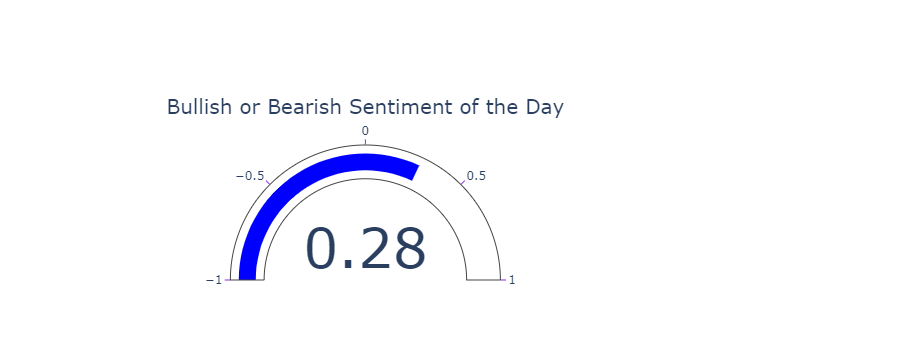

In [145]:

fig.show()